# Penugasan pertemuan Jumat 17 Januari 2025
1. Analisa penjualan setiap bulan dari produk kalian (Ivory230)--> jumlah penjualan setiap bulan
2. Visualisasikan pendapatan tertinggi setiap bulannya, hitung total pendapatan untuk produk setiap bulan--> list, ["Januari";200000;"Februari";300000]--> Visualisasikan
3. Kasih legenda disetiap visualisasi

# Jawaban

## Persiapan Data

### A. Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### B. Persiapan Data set

In [3]:
data_jualan=pd.read_csv("data_penjualan.csv", delimiter=";")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


### C. Pemeriksaan Data

In [4]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tanggal       1076 non-null   object 
 1   Jenis Produk  1056 non-null   object 
 2   Jumlah Order  1031 non-null   float64
 3   Harga         1024 non-null   float64
 4   Total         1022 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.2+ KB


In [5]:
#Pengecekan data missing
data_jualan.isna().sum()

Tanggal          0
Jenis Produk    20
Jumlah Order    45
Harga           52
Total           54
dtype: int64

In [6]:
data_jualan["Jenis Produk"].isna().sum()

20

In [7]:
data_jualan["Jumlah Order"].isna().sum()

45

In [8]:
data_jualan["Harga"].isna().sum()

52

In [9]:
data_jualan["Total"].isna().sum()

54

### Dari Data awal terlihat masih terdapat data yang memiliki nilai 'Null'/Blank, untuk itu diperlukan tindakan pembersihan/cleansing data

### D. Pembersihan Data

In [10]:
#karena tipe data untuk kolom tanggal belum bertipe datetime, oleh karena itu perlu dilakukan konversi tipe data terlebih dahulu
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], format="%d/%m/%Y")

In [11]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1056 non-null   object        
 2   Jumlah Order  1031 non-null   float64       
 3   Harga         1024 non-null   float64       
 4   Total         1022 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 42.2+ KB


#### Dari ringkasan data dapat dilihat jika untuk kolom 'Jenis Produk', 'Jumlah Order', 'Harga' dan 'Total' masih memiliki nilai 'Null'oleh karena itu perlu kita lakukan cleansing data, dengan metode ketiga yaitu metode "REPLACING"

In [12]:
data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_12684\3211667542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)


In [13]:
data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace=True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_12684\1446405066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace=True)


In [14]:
data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_12684\908935075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)


In [15]:
data_jualan["Total"].fillna(data_jualan["Jumlah Order"] * data_jualan["Harga"], inplace=True)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_12684\3345186248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["Total"].fillna(data_jualan["Jumlah Order"] * data_jualan["Harga"], inplace=True)


In [16]:
data_jualan.isna().sum()

Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64

#### Setelah dilakukan pembersihan data dari missing value maka diperoleh hasil:

In [17]:
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0


In [18]:
data_jualan.describe()

,Tanggal,Jumlah Order,Harga,Total
count,1076,1076.000000,1076.000000,1.076000e+03
mean,2023-04-09 15:48:50.855018752,1915.332687,1713.202148,2.348091e+06
min,2022-08-05 00:00:00,5.000000,100.000000,1.537600e+04
25%,2022-12-13 00:00:00,1000.000000,1000.000000,1.312500e+06
50%,2023-04-26 00:00:00,1000.000000,1500.000000,1.800000e+06
75%,2023-08-09 00:00:00,2000.000000,1800.000000,3.000000e+06
max,2023-11-15 00:00:00,40000.000000,99970.000000,2.149355e+07
std,NaN,2491.758284,3352.475721,1.731626e+06


### E. Filter Dataframe

#### Sebelum dilakukan filtering, untuk keperluan analisis bulanan maka diperlukan kolom tambahan yaitu kolom "Bulan"

In [36]:
data_jualan["Bulan"] = data_jualan["Tanggal"].dt.month_name()
data_jualan["Tahun"] = data_jualan["Tanggal"].dt.year
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
0,2022-08-05,Foodpak260,1000.0,1800.0,1800000.0,August,2022
1,2022-08-05,FoodpakMatte245,1000.0,1900.0,1900000.0,August,2022
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August,2022
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August,2022
4,2022-08-07,Dupleks310,1000.0,1550.0,1550000.0,August,2022
...,...,...,...,...,...,...,...
1071,2023-11-14,Ivory230,1000.0,900.0,900000.0,November,2023
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November,2023
1073,2023-11-15,CraftLaminasi290,1500.0,875.0,1312500.0,November,2023
1074,2023-11-15,FoodpakMatte,1000.0,2200.0,2200000.0,November,2023


#### Karena Dataframe yang diinginkan terbatas oleh produk "Ivory230" maka diperlukan suatu dataframe terbaru yang hanya menampilkan Jenis Produk "Ivory230"

In [62]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1076 non-null   datetime64[ns]
 1   Jenis Produk  1076 non-null   object        
 2   Jumlah Order  1076 non-null   float64       
 3   Harga         1076 non-null   float64       
 4   Total         1076 non-null   float64       
 5   Bulan         1076 non-null   object        
 6   Tahun         1076 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 54.8+ KB


In [69]:
data_jualan_ivory= data_jualan[data_jualan["Jenis Produk"]=="Ivory230"]
data_jualan_ivory_2022 = data_jualan_ivory[data_jualan_ivory["Tahun"]==2022]
data_jualan_ivory_2023 = data_jualan_ivory[data_jualan_ivory["Tahun"]==2023]

df2 = data_jualan_ivory_2022
df3 = data_jualan_ivory_2023

df2


,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
26,2022-08-15,Ivory230,3000.000000,950.000000,2850000.0,August,2022
47,2022-08-29,Ivory230,2000.000000,1450.000000,2900000.0,August,2022
59,2022-09-02,Ivory230,2000.000000,945.000000,1890000.0,September,2022
64,2022-09-05,Ivory230,1915.332687,1200.000000,1200000.0,September,2022
115,2022-09-24,Ivory230,1000.000000,1600.000000,1600000.0,September,2022
116,2022-09-24,Ivory230,1000.000000,1713.202148,1600000.0,September,2022
118,2022-09-24,Ivory230,1000.000000,1700.000000,1700000.0,September,2022
122,2022-09-24,Ivory230,1000.000000,1150.000000,1150000.0,September,2022
134,2022-10-12,Ivory230,2000.000000,1450.000000,2900000.0,October,2022
135,2022-10-13,Ivory230,2000.000000,945.000000,1890000.0,October,2022


In [70]:
df3

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan,Tahun
311,2023-01-01,Ivory230,1000.0,1400.0,1400000.0,January,2023
315,2023-01-01,Ivory230,1500.0,1600.0,2400000.0,January,2023
327,2023-01-06,Ivory230,1000.0,1000.0,1000000.0,January,2023
329,2023-01-06,Ivory230,1000.0,1700.0,1700000.0,January,2023
332,2023-01-06,Ivory230,1000.0,1700.0,1700000.0,January,2023
...,...,...,...,...,...,...,...
1050,2023-11-08,Ivory230,3500.0,1100.0,3850000.0,November,2023
1055,2023-11-10,Ivory230,1000.0,1400.0,1400000.0,November,2023
1056,2023-11-10,Ivory230,1000.0,1600.0,1600000.0,November,2023
1070,2023-11-14,Ivory230,1000.0,1300.0,1300000.0,November,2023


## 1. Analisa penjualan setiap bulan dari produk kalian (Ivory230)--> jumlah penjualan setiap bulan

In [21]:
data_jualan_ivory

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
26,2022-08-15,Ivory230,3000.000000,950.0,2850000.0,August
47,2022-08-29,Ivory230,2000.000000,1450.0,2900000.0,August
59,2022-09-02,Ivory230,2000.000000,945.0,1890000.0,September
64,2022-09-05,Ivory230,1915.332687,1200.0,1200000.0,September
115,2022-09-24,Ivory230,1000.000000,1600.0,1600000.0,September
...,...,...,...,...,...,...
1050,2023-11-08,Ivory230,3500.000000,1100.0,3850000.0,November
1055,2023-11-10,Ivory230,1000.000000,1400.0,1400000.0,November
1056,2023-11-10,Ivory230,1000.000000,1600.0,1600000.0,November
1070,2023-11-14,Ivory230,1000.000000,1300.0,1300000.0,November


## Pendapatan perbulan tahun 2022

In [74]:
#buat kolom baru yang digunakan untuk menghitung total jumlah penjualan dan total pendapatan
penghasilan_bulanan_2022 = df2.groupby("Bulan").agg(
total_order = ("Jumlah Order","sum"),
total_pendapatan_sebulan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
pb2 = penghasilan_bulanan_2022
pb2

,total_order,total_pendapatan_sebulan
Bulan,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,5000.000000,5750000.0
September,7915.332687,9140000.0


In [79]:
pb2.describe()

,total_order,total_pendapatan_sebulan
count,5.000000,5.000000e+00
mean,9483.066537,1.177200e+07
std,3832.744995,5.206906e+06
min,5000.000000,5.750000e+06
25%,7915.332687,9.140000e+06
50%,9500.000000,1.124000e+07
75%,9500.000000,1.299000e+07
max,15500.000000,1.974000e+07


In [80]:
pb2.max()

total_order                    15500.0
total_pendapatan_sebulan    19740000.0
dtype: float64

In [ ]:
pb2 = penghasilan_bulanan_2022
pb2

## Pendapatan perbulan tahun 2023

In [75]:
#buat kolom baru yang digunakan untuk menghitung total jumlah penjualan dan total pendapatan
penghasilan_bulanan_2023 = df3.groupby("Bulan").agg(
total_order = ("Jumlah Order","sum"),
total_pendapatan_sebulan = ("Total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
pb3 = penghasilan_bulanan_2023
pb3

,total_order,total_pendapatan_sebulan
Bulan,,
January,10415.332687,14600000.0
February,17915.332687,19175000.0
March,12120.000000,13066000.0
April,13500.000000,14890000.0
May,13000.000000,18800000.0
June,16500.000000,18540000.0
July,16415.332687,19350000.0
August,17000.000000,19295000.0
September,10500.000000,11640000.0


In [76]:
pb3.describe()

,total_order,total_pendapatan_sebulan
count,11.000000,1.100000e+01
mean,13396.908915,1.573600e+07
std,3267.980942,3.556877e+06
min,7500.000000,9.050000e+06
25%,11310.000000,1.383300e+07
50%,13000.000000,1.489000e+07
75%,16457.666343,1.898750e+07
max,17915.332687,1.935000e+07


In [78]:
pb3.max()

total_order                 1.791533e+04
total_pendapatan_sebulan    1.935000e+07
dtype: float64

## 2. Visualisasikan pendapatan tertinggi setiap bulannya, hitung total pendapatan untuk produk setiap bulan--> list, ["Januari";200000;"Februari";300000]--> Visualisasikan

#### Analisis Pendapatan tertinggi 2022

In [107]:
# membuat list pendapatan tertinggi perbulan 
#buat kolom baru yang digunakan untuk menghitung total jumlah penjualan dan total pendapatan
penghasilan_tertinggi_2022 = df2.groupby("Bulan").agg(
    tanggal=("Tanggal","max"),
    pendapatan_tertinggi_dalam_bulan = ("Total","max")
).reindex(['August', 'September', 'October', 'November', 'December'])
pt2 = penghasilan_tertinggi_2022
pt2

,tanggal,pendapatan_tertinggi_dalam_bulan
Bulan,,
August,2022-08-29,2900000.0
September,2022-09-24,1890000.0
October,2022-10-24,2900000.0
November,2022-11-26,2850000.0
December,2022-12-15,2900000.0


In [108]:
pt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, August to December
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tanggal                           5 non-null      datetime64[ns]
 1   pendapatan_tertinggi_dalam_bulan  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 120.0+ bytes


In [109]:
pt2["Bulan"] = pt2["tanggal"].dt.month_name()
pt2

,tanggal,pendapatan_tertinggi_dalam_bulan,Bulan
Bulan,,,
August,2022-08-29,2900000.0,August
September,2022-09-24,1890000.0,September
October,2022-10-24,2900000.0,October
November,2022-11-26,2850000.0,November
December,2022-12-15,2900000.0,December


In [91]:
pt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tanggal                           5 non-null      datetime64[ns]
 1   pendapatan_tertinggi_dalam_bulan  5 non-null      float64       
 2   Bulan                             5 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 384.0+ bytes


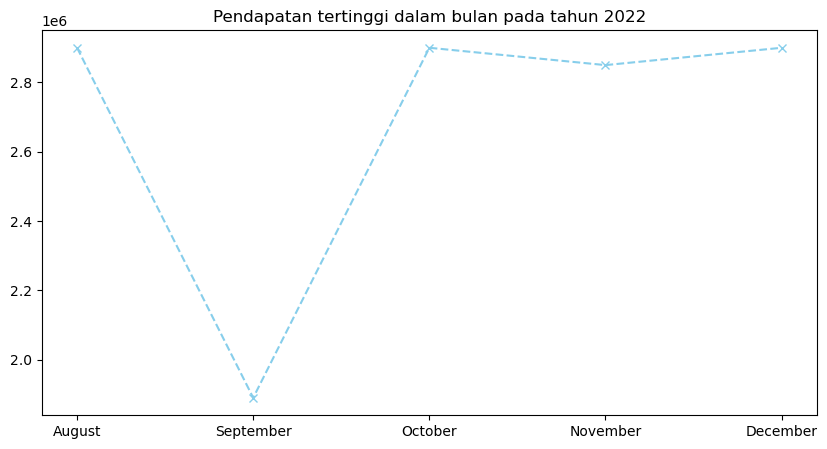

In [110]:
plt.figure(figsize=(10,5))
plt.plot(pt2["Bulan"],pt2["pendapatan_tertinggi_dalam_bulan"],marker='x',linestyle='--',color="skyblue")
plt.title("Pendapatan tertinggi dalam bulan pada tahun 2022")
plt.show()

#### Analisis Pendapatan tertinggi 2023

In [125]:
# membuat list pendapatan tertinggi perbulan 
#buat kolom baru yang digunakan untuk menghitung total jumlah penjualan dan total pendapatan
penghasilan_tertinggi_2023 = df3.groupby("Bulan").agg(
    tanggal=("Tanggal","max"),
    pendapatan_tertinggi_dalam_bulan = ("Total","max")
).reindex(['January','February','March','April','May','June','July','August', 'September', 'October', 'November'])
pt3 = penghasilan_tertinggi_2023
pt3

,tanggal,pendapatan_tertinggi_dalam_bulan
Bulan,,
January,2023-01-06,2400000.0
February,2023-02-23,2900000.0
March,2023-03-28,2850000.0
April,2023-04-30,2800000.0
May,2023-05-31,2900000.0
June,2023-06-26,4200000.0
July,2023-07-31,2800000.0
August,2023-08-29,3850000.0
September,2023-09-20,2800000.0


In [108]:
pt3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, August to December
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tanggal                           5 non-null      datetime64[ns]
 1   pendapatan_tertinggi_dalam_bulan  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 120.0+ bytes


In [126]:
pt3["Bulan"] = pt3["tanggal"].dt.month_name()
pt3

,tanggal,pendapatan_tertinggi_dalam_bulan,Bulan
Bulan,,,
January,2023-01-06,2400000.0,January
February,2023-02-23,2900000.0,February
March,2023-03-28,2850000.0,March
April,2023-04-30,2800000.0,April
May,2023-05-31,2900000.0,May
June,2023-06-26,4200000.0,June
July,2023-07-31,2800000.0,July
August,2023-08-29,3850000.0,August
September,2023-09-20,2800000.0,September


In [127]:
pt3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, January to November
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   tanggal                           11 non-null     datetime64[ns]
 1   pendapatan_tertinggi_dalam_bulan  11 non-null     float64       
 2   Bulan                             11 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 352.0+ bytes


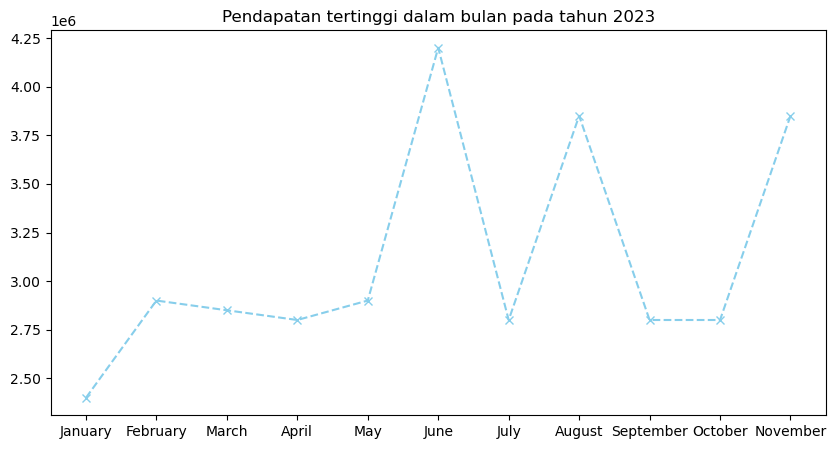

In [128]:
plt.figure(figsize=(10,5))
plt.plot(pt3["Bulan"],pt3["pendapatan_tertinggi_dalam_bulan"],marker='x',linestyle='--',color="skyblue")
plt.title("Pendapatan tertinggi dalam bulan pada tahun 2023")
plt.show()

## 3. Kasih legenda disetiap visualisasi

#### Nilai penjualan tertinggi dalam 1 bulan pada tahun 2022

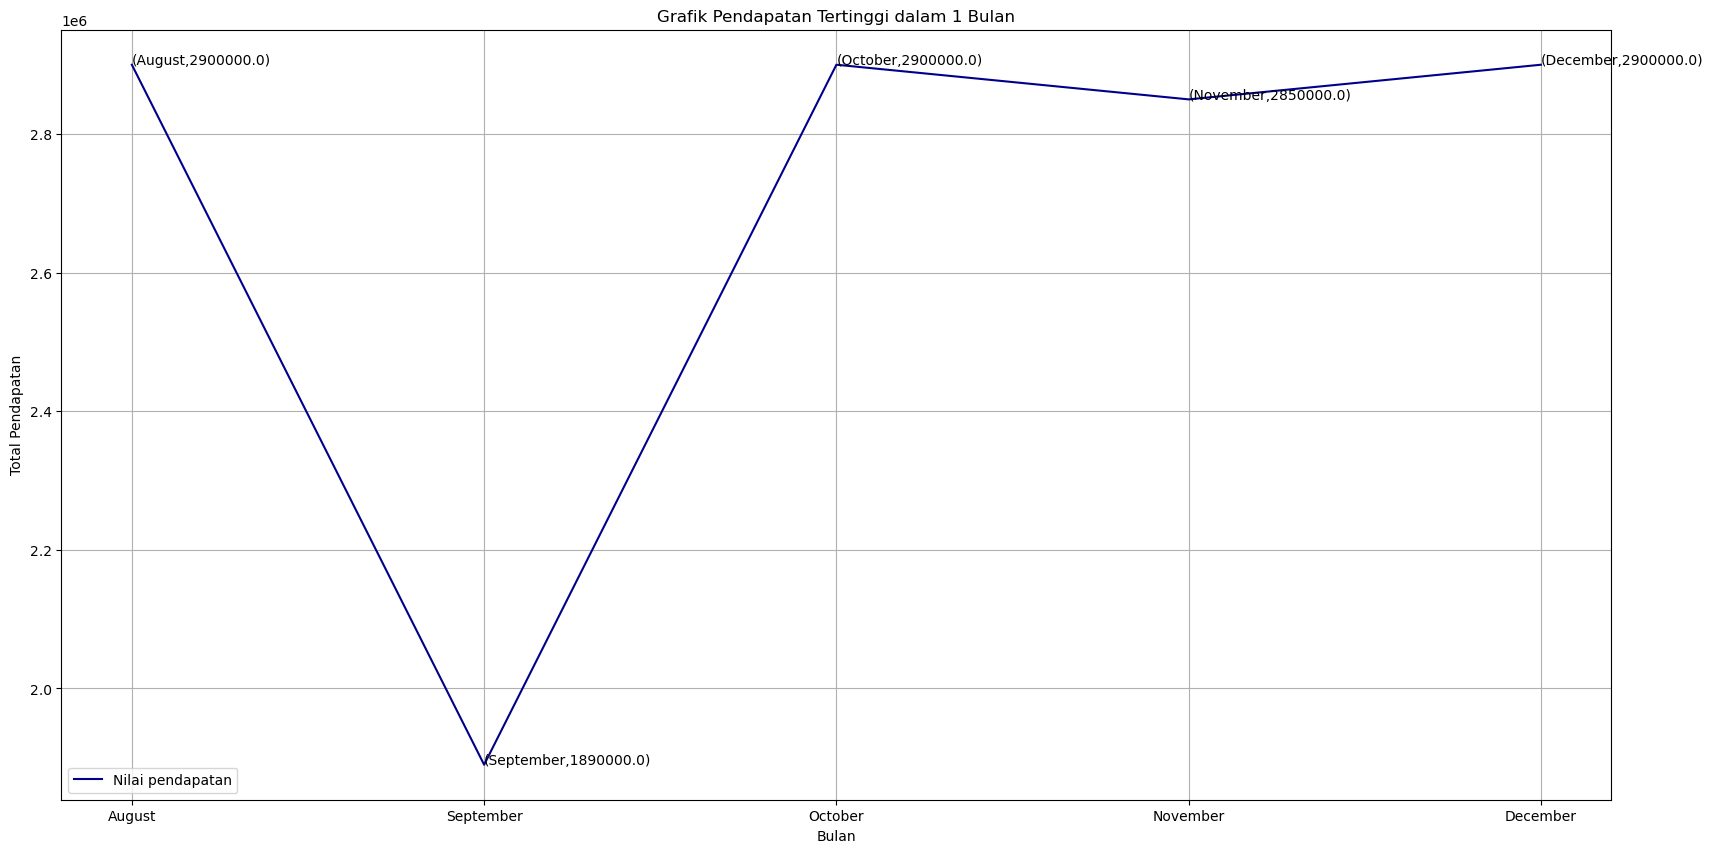

In [141]:
# membuat visualisasi dalam grafik/chart
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

A = pt2["Bulan"]
B = pt2["pendapatan_tertinggi_dalam_bulan"]
C = pt2["tanggal"]
D = 'Nilai Pendapatan'
ax.plot(A,B,label='Nilai pendapatan',color="darkblue")
for xy in zip(A, B):                                      # <--
    ax.annotate('(%s,%s)' % xy, xy=xy, textcoords='data') # <--

ax.grid()
ax.legend()
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.title("Grafik Pendapatan Tertinggi dalam 1 Bulan")
plt.show()


#### Nilai penjualan tertinggi dalam 1 bulan pada tahun 2023

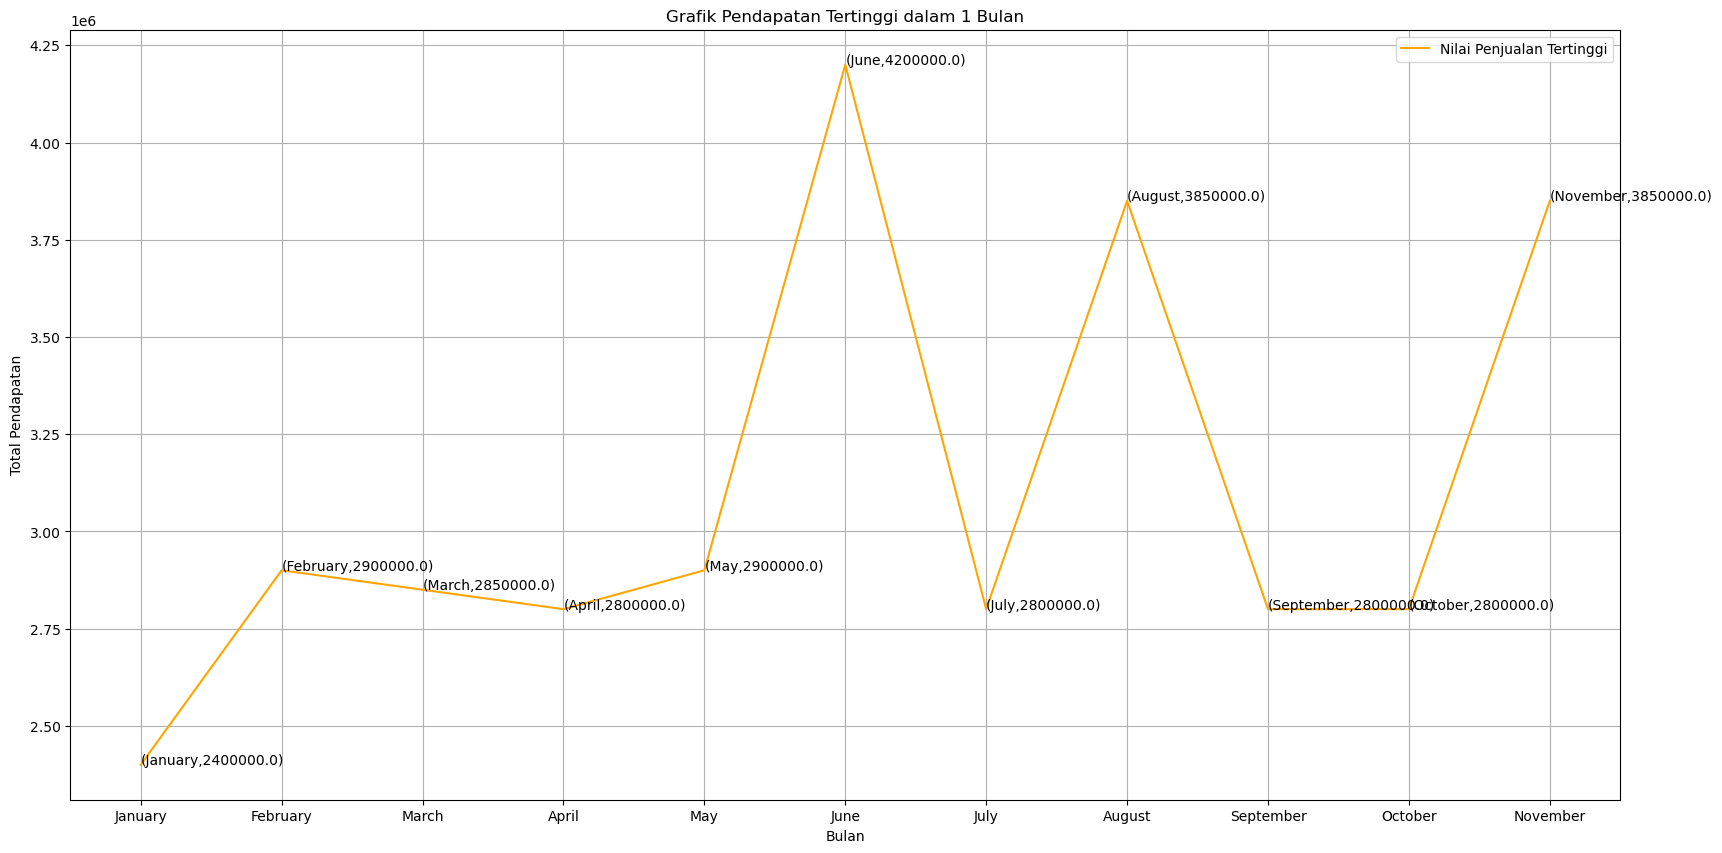

In [136]:
# membuat visualisasi dalam grafik/chart
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

E = pt3["Bulan"]
F = pt3["pendapatan_tertinggi_dalam_bulan"]
G = pt3["tanggal"]

ax.plot(E,F,label='Nilai Penjualan Tertinggi',color="orange")
for xy in zip(E,F):                                      # <--
    ax.annotate('(%s,%s)' % xy, xy=xy, textcoords='data') # <--

ax.grid()
ax.legend()
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.title("Grafik Pendapatan Tertinggi dalam 1 Bulan")
plt.show()


#### Analisis Gabungan

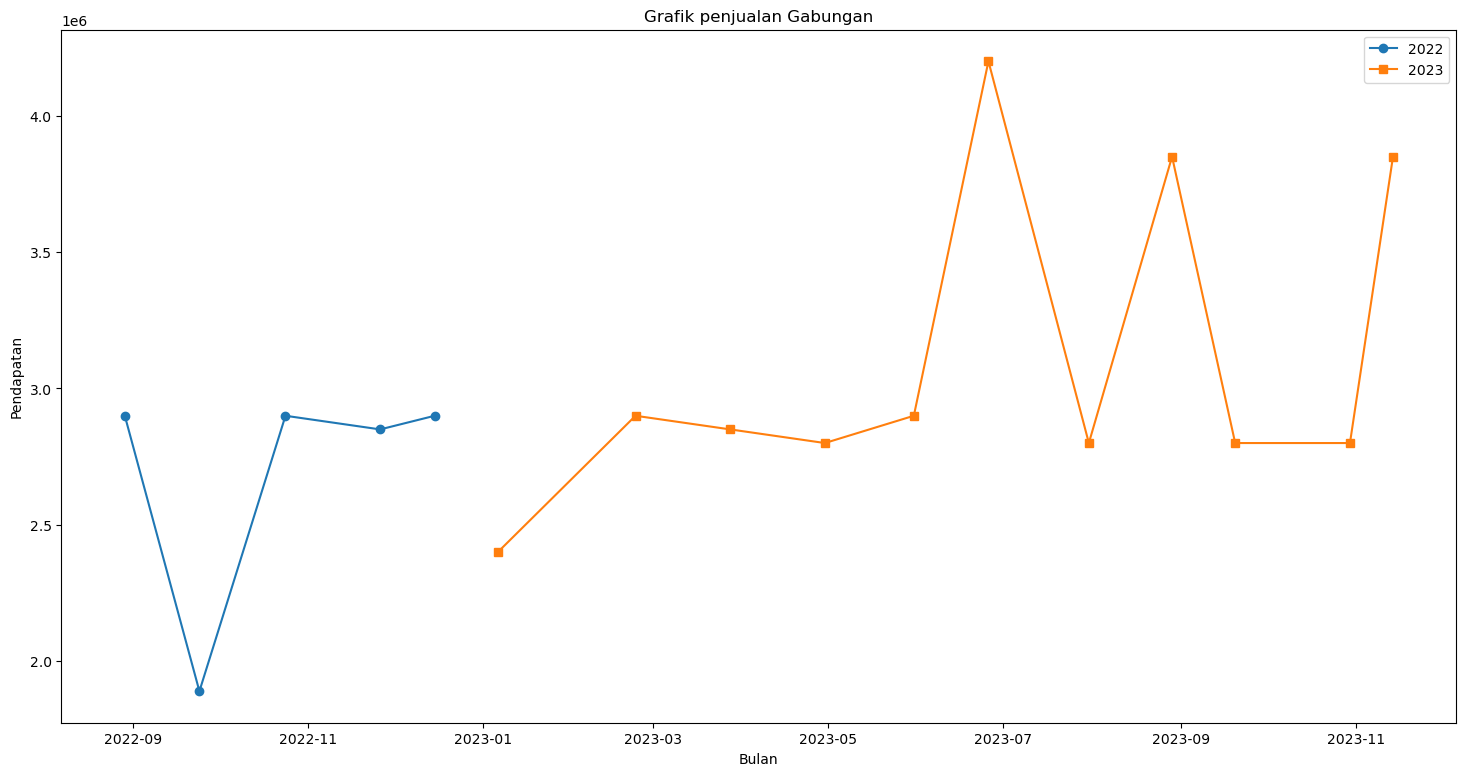

In [133]:
# Sample data
plt.figure(figsize=(18,9))

# Plotting the lines
plt.plot(C, B, label='2022', marker='o')
plt.plot(G, F, label='2023', marker='s')

# Adding titles and labels
plt.title('Grafik penjualan Gabungan')
plt.xlabel('tanggal')
plt.ylabel('Pendapatan')

# Adding a legend
plt.legend()

# Display the plot
plt.show()